In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"
HTML(style)

In [2]:
td=pd.read_csv('C:/Users/9/Downloads/titanic_data/train.csv')

In [3]:
td.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
X = td.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [6]:
y = td.Survived

In [7]:
X.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,NaN,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S
7,3,male,2.0,3,1,21.0750,S
8,3,female,27.0,0,2,11.1333,S
9,2,female,14.0,1,0,30.0708,C


In [8]:
X = pd.get_dummies(X)

In [9]:
X.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
5,3,NaN,0,0,8.4583,0,1,0,1,0
6,1,54.0,0,0,51.8625,0,1,0,0,1
7,3,2.0,3,1,21.0750,0,1,0,0,1
8,3,27.0,0,2,11.1333,1,0,0,0,1
9,2,14.0,1,0,30.0708,1,0,1,0,0


In [10]:
X.Age.median()

28.0

In [11]:
X = X.fillna({'Age': X.Age.median()})

In [12]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [13]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [14]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [15]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

[Text(3488.314473976868, 1325.025, 'Sex_female <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(2234.373609875445, 1257.075, 'Fare <= 26.269\nentropy = 0.699\nsamples = 577\nvalue = [468, 109]'),
 Text(1133.9029137010675, 1189.125, 'Age <= 13.5\nentropy = 0.558\nsamples = 415\nvalue = [361, 54]'),
 Text(446.79715302491104, 1121.175, 'SibSp <= 2.0\nentropy = 0.567\nsamples = 15\nvalue = [2, 13]'),
 Text(407.0818505338078, 1053.225, 'Parch <= 0.5\nentropy = 0.371\nsamples = 14\nvalue = [1, 13]'),
 Text(367.3665480427046, 985.275, 'Age <= 11.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(327.6512455516014, 917.325, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(407.0818505338078, 917.325, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(446.79715302491104, 985.275, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(486.5124555160142, 1053.225, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(1821.0086743772242, 1121.175, 'Embarked_C <= 0.5\nent

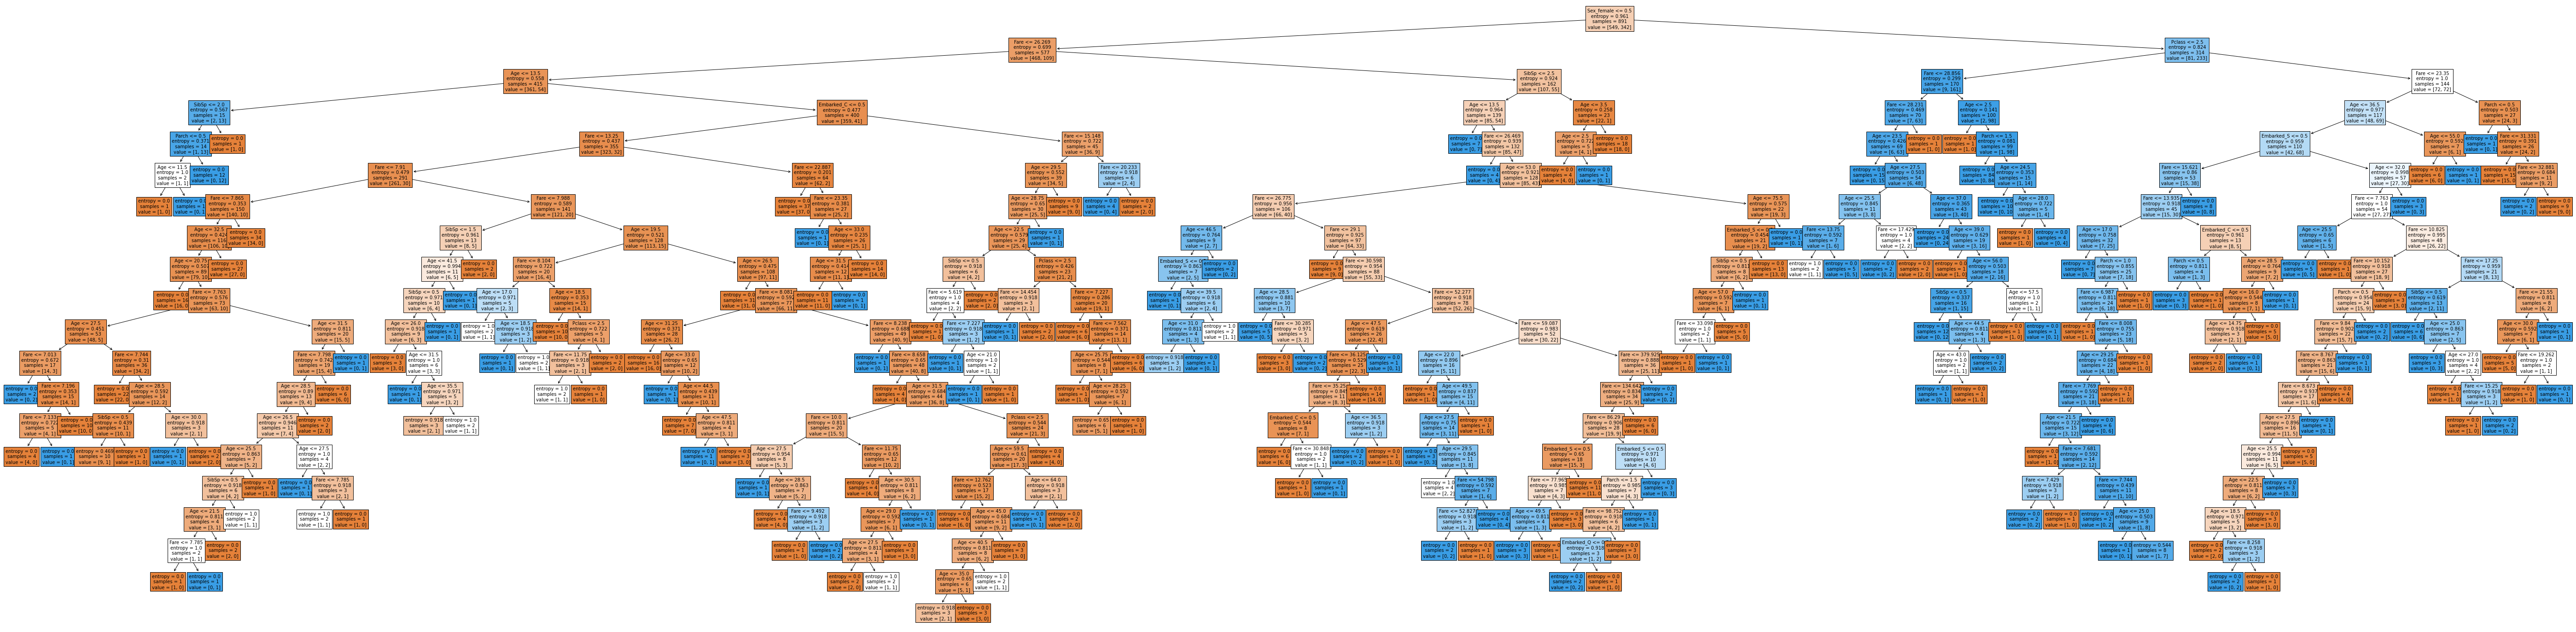

In [16]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
X_train.shape

(596, 10)

In [20]:
X_test.shape

(295, 10)

In [21]:
clf.score(X, y)

0.9797979797979798

In [22]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [23]:
clf.fit(X_train, y_train).get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [24]:
clf.score(X_train, y_train)

0.9798657718120806

In [25]:
clf.score(X_test, y_test)

0.7694915254237288

In [26]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 5)

In [27]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [28]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [29]:
clf.score(X_train, y_train)

0.8406040268456376

In [30]:
clf.score(X_test, y_test)

0.8101694915254237

In [31]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3)

In [32]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [33]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [34]:
clf.score(X_train, y_train)

0.8238255033557047

In [35]:
clf.score(X_test, y_test)

0.8203389830508474

In [36]:
max_depth_values = range(1, 100)

In [37]:
scores_data = pd.DataFrame()

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 4)

In [40]:
cross_val_score(clf, X_train, y_train, cv = 5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [41]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    
    temp_sd = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score], 'cross_val_score': [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_sd)

In [42]:
scores_data.head(10)

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.797031
0,6,0.867450,0.769492,0.803754
0,7,0.882550,0.783051,0.795336
0,8,0.907718,0.796610,0.800364
0,9,0.917785,0.800000,0.790280
0,10,0.926174,0.796610,0.796989


In [43]:
sdl = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['train_score', 'test_score', 'cross_val_score'],
             var_name='set_type', value_name='score')

In [44]:
sdl.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [45]:
sdl.tail()

,max_depth,set_type,score
292,95,cross_val_score,0.775224
293,96,cross_val_score,0.773557
294,97,cross_val_score,0.768515
295,98,cross_val_score,0.773543
296,99,cross_val_score,0.766821


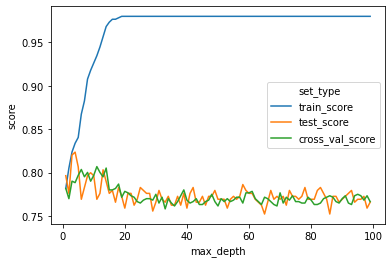

In [46]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=sdl)

In [47]:
sdl.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.797031
203,6,cross_val_score,0.803754
204,7,cross_val_score,0.795336
205,8,cross_val_score,0.800364
206,9,cross_val_score,0.790280
207,10,cross_val_score,0.796989


In [48]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 10)

In [49]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [50]:
best_clf.score(X_test, y_test)

0.8067796610169492

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
gs_clf = tree.DecisionTreeClassifier()

In [53]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [54]:
grid_search_cv_clf = GridSearchCV(gs_clf, parametrs, cv=5)

In [55]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [56]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [57]:
the_best_clf = grid_search_cv_clf.best_estimator_

In [58]:
the_best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [59]:
the_best_clf.score(X_test, y_test)

0.7661016949152543

In [60]:
from sklearn.metrics import precision_score

In [61]:
y_pred = the_best_clf.predict(X_test)

In [62]:
precision_score(y_test, y_pred)

0.7931034482758621

In [63]:
from sklearn.metrics import recall_score

In [64]:
recall_score(y_test, y_pred)

0.575

In [65]:
y_predicted_prob = the_best_clf.predict_proba(X_test)

In [66]:
y_predicted_prob

array([[0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.        , 1.        ],
       [0.65625   , 0.34375   ],
       [1.        , 0.        ],
       [0.23809524, 0.76190476],
       [0.88518519, 0.11481481],
       [0.23809524, 0.76190476],
       [0.        , 1.        ],
       [0.125     , 0.875     ],
       [0.88518519, 0.11481481],
       [1.        , 0.        ],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.65625   , 0.34375   ],
       [0.88518519, 0.11481481],
       [1.        , 0.        ],
       [0.88518519, 0.11481481],
       [0.60714286, 0.39285714],
       [0.65625   , 0.34375   ],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.6       , 0.4       ],
       [0.60714286, 0.39285714],
       [0.88518519, 0.11481481],
       [0.6       , 0.4       ],
       [0.65625   , 0.34375   ],
       [0.

In [67]:
y_predicted_prob[:, 1]

array([0.11481481, 0.11481481, 0.11481481, 1.        , 0.34375   ,
       0.        , 0.76190476, 0.11481481, 0.76190476, 1.        ,
       0.875     , 0.11481481, 0.        , 0.11481481, 0.11481481,
       1.        , 0.        , 0.34375   , 0.11481481, 0.        ,
       0.11481481, 0.39285714, 0.34375   , 0.11481481, 0.11481481,
       0.4       , 0.39285714, 0.11481481, 0.4       , 0.34375   ,
       0.11481481, 0.76190476, 0.39285714, 0.76190476, 0.11481481,
       0.11481481, 0.39285714, 0.76190476, 1.        , 0.11481481,
       0.        , 0.11481481, 0.11481481, 0.11481481, 0.        ,
       0.11481481, 0.11481481, 0.11481481, 0.11481481, 0.6       ,
       1.        , 0.92307692, 0.11481481, 0.41176471, 0.11481481,
       1.        , 0.11481481, 0.92307692, 1.        , 0.34375   ,
       0.11481481, 1.        , 1.        , 0.        , 0.11481481,
       0.92307692, 0.41176471, 0.11481481, 0.11481481, 0.92307692,
       0.        , 1.        , 0.39285714, 1.        , 0.11481

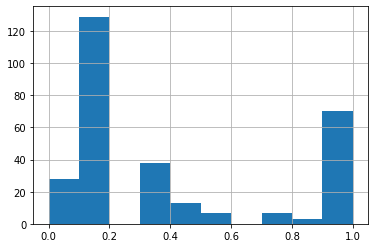

In [68]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [69]:
import numpy as np

In [70]:
np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0])

In [71]:
y_pred_new = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

In [72]:
precision_score(y_test, y_pred_new)

0.8493150684931506

In [73]:
recall_score(y_test, y_pred_new)

0.5166666666666667

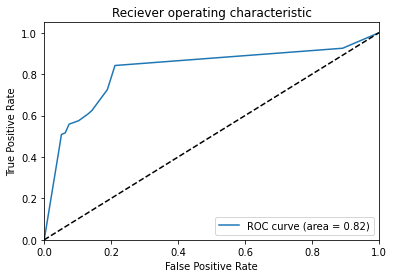

In [74]:
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification

fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever operating characteristic')
plt.legend(loc='lower right')

In [82]:
next_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [83]:
next_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

[Text(418.5, 237.82500000000002, 'Sex_female <= 0.5\nentropy = 0.953\nsamples = 596\nvalue = [374, 222]'),
 Text(167.4, 169.875, 'Age <= 3.5\nentropy = 0.696\nsamples = 390\nvalue = [317, 73]'),
 Text(83.7, 101.92500000000001, 'entropy = 0.779\nsamples = 13\nvalue = [3, 10]'),
 Text(251.10000000000002, 101.92500000000001, 'Fare <= 52.277\nentropy = 0.651\nsamples = 377\nvalue = [314, 63]'),
 Text(167.4, 33.974999999999994, 'entropy = 0.58\nsamples = 332\nvalue = [286, 46]'),
 Text(334.8, 33.974999999999994, 'entropy = 0.956\nsamples = 45\nvalue = [28, 17]'),
 Text(669.6, 169.875, 'Pclass <= 2.5\nentropy = 0.851\nsamples = 206\nvalue = [57, 149]'),
 Text(585.9, 101.92500000000001, 'Fare <= 149.035\nentropy = 0.23\nsamples = 107\nvalue = [4, 103]'),
 Text(502.20000000000005, 33.974999999999994, 'entropy = 0.149\nsamples = 94\nvalue = [2, 92]'),
 Text(669.6, 33.974999999999994, 'entropy = 0.619\nsamples = 13\nvalue = [2, 11]'),
 Text(753.3000000000001, 101.92500000000001, 'entropy = 0.996

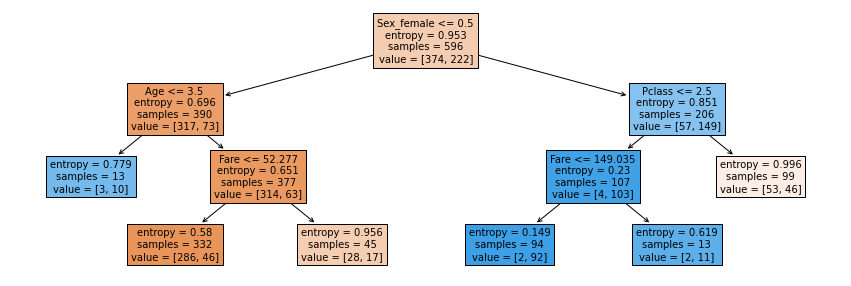

In [84]:
plt.figure(figsize=(15, 5))
tree.plot_tree(next_clf, fontsize=10, feature_names=list(X), filled=True)